In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv("Crop_recommendation.csv")
df.shape

(2200, 8)

# Basic EDA

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [5]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
#seperate the target from feature
y=df["label"] 
X = df.drop(['label'], axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [8]:
#implementing K-NN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
predictions = knn.predict(X_test)

In [11]:
# model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        21
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        37
        jute       0.86      0.70      0.78        27
 kidneybeans       0.96      1.00      0.98        27
      lentil       1.00      0.96      0.98        23
       maize       1.00      0.96      0.98        24
       mango       1.00      1.00      1.00        23
   mothbeans       0.97      0.97      0.97        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00      1.00        19
      papaya       1.00    

In [13]:
# test the algo for multiple K-values
# for this we will find error values for each K from 1 to 30
error_value = []
for i in range(1,30):
    knn= KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_value.append(np.mean(prediction_i != y_test))

print(error_value.index(min(error_value)))  
# index of min value +1 will be the best K value

5


Text(0, 0.5, 'Error Value')

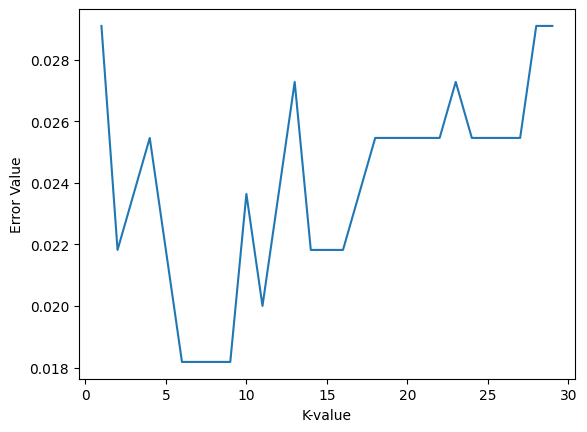

In [14]:
# visualization helps in picking the best K value
plt.plot(range(1,30),error_value)
plt.xlabel("K-value")
plt.ylabel("Error Value")

In [15]:
# Re-evluate the model with K=5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train,y_train)
pred = knn2.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.93      1.00      0.97        28
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        21
      cotton       0.97      0.97      0.97        30
      grapes       1.00      1.00      1.00        37
        jute       0.89      0.93      0.91        27
 kidneybeans       0.93      1.00      0.96        27
      lentil       1.00      0.96      0.98        23
       maize       0.96      0.96      0.96        24
       mango       1.00      1.00      1.00        23
   mothbeans       0.96      0.93      0.95        29
    mungbean       1.00      1.00      1.00        26
   muskmelon       1.00      1.00      1.00        33
      orange       1.00      1.00      1.00        19
      papaya       1.00    

In [17]:
#input_data = [90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]
#input_array = np.array(input_data)
#we need to reshape it so that model can know that it is a single data point
#input_reshaped = input_array.reshape(1,-1)
#op = knn2.predict(input_reshaped)
#print(op[0])

# Making the Recommender System

In [18]:
# saving the model
import pickle

In [19]:
pickle.dump(knn2, open('CropRecommender.sav', 'wb')) 
#thiss sav file is used in deploying

In [20]:
# loading the saved model
# loaded_model = pickle.load(ope('CropRecommender.sav', 'rb')) 

# do same stuff...input data, reshape then predict
# for prediction instead of knn2 use loaded_model.predict()